In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [203]:
iris_data_path = "./iris.data"

In [204]:
iris_dataset = pd.read_csv(iris_data_path, header=None)

In [143]:
type(iris_dataset)

pandas.core.frame.DataFrame

In [205]:
iris_dataset.pop(4)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 4, Length: 150, dtype: object

In [206]:
iris_dataset

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
####### lets start the kMeans

In [214]:
iris_dataset = iris_dataset.sample(frac=1).reset_index(drop=True)


In [147]:
iris_dataset.loc[[1,2]]

,0,1,2,3
1,5.8,2.7,5.1,1.9
2,6.1,2.8,4.7,1.2


In [148]:
K = 3

In [215]:
centroids = [iris_dataset.loc[i] for i in range(K)]

In [209]:
centroids


[0    7.7
 1    2.8
 2    6.7
 3    2.0
 Name: 0, dtype: float64,
 0    6.0
 1    3.0
 2    4.8
 3    1.8
 Name: 1, dtype: float64,
 0    4.5
 1    2.3
 2    1.3
 3    0.3
 Name: 2, dtype: float64]

In [216]:
max_iterations = 1000
tol = 0.0001
clusters = [[] for _ in range(K)]

In [217]:
for i_iter in range(max_iterations):


    clusters = [[] for _ in range(K)]


    for i in range(iris_dataset.shape[0]):
        
        # find dists from all the centroids
        dists_from_centroid = [np.linalg.norm(iris_dataset.loc[i] - centroids[j]) for j in range(0, K)]

        # get the min dist from centroid
        min_dist_idx = dists_from_centroid.index(min(dists_from_centroid))

        clusters[min_dist_idx].append(iris_dataset.loc[i])

    prev_centroids = centroids

    centroids = [np.average(cluster, axis=0) for cluster in clusters]

    # if optimized, then break else go for another round
    is_optimized = True

    for i in range(K):
        original_centroid = prev_centroids[i]
        curr_centroid = centroids[i]

        diff = np.sum((curr_centroid - original_centroid) / original_centroid * 100.0)
        print(diff)
        if diff > tol:
            is_optimized = False

    if is_optimized:
        print(f'{i_iter} iterations to find the optimal solutions')
        break




174.45514255859092
53.916312353234176
0.8805942219598109
66.49481381758099
-2.4240947924792193
2.4547629280527814
69.99087194045222
-2.2079404555366478
2.976592236771783
52.79408872672558
-0.6264727097919403
8.689939050365975
19.820951245720156
0.0
9.658898716415077
6.992042820058505
0.0
4.970496766735539
5.079414856579923
0.0
3.005369492926061
4.425999239999902
0.0
1.8048019872139496
6.053330959048623
0.0
3.5491575368446577
2.9375146612004865
0.0
2.455930521904423
4.0371097487918455
0.0
3.3330518242140164
2.6892181761517846
0.0
2.6662643053779185
1.8394282892145153
0.0
3.71313062253654
1.417789495907475
0.0
0.46171538825085173
0.0
0.0
0.0
14 iterations to find the optimal solutions


In [129]:
# store the prev centroids and make the average of each cluster as the new centroid

In [218]:
# average corresponding values


print(centroids)

[array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), array([5.006, 3.418, 1.464, 0.244]), array([6.85384615, 3.07692308, 5.71538462, 2.05384615])]


In [168]:


# new centroid ... check if optimization is complete
# if yes, then stop the process
# else continue 

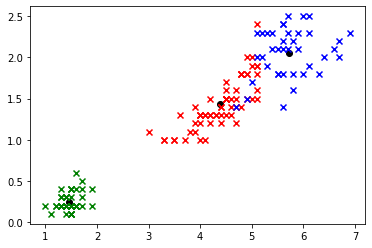

In [219]:
####### for each cluster --> print(each series with values and index)
colors = ["r", "g", "b"]



######### mark the centroids
for i in range(len(centroids)):
    plt.scatter(centroids[i][2], centroids[i][3], color= "k", marker="o")


i = 0
for cluster in clusters:

    color_for_this_cluster = colors[i]
    
    i += 1

    for point in cluster:

        plt.scatter(point[2], point[3], color = color_for_this_cluster, marker="x")

plt.show()

In [187]:
clusters[0][0]

0    6.9
1    3.1
2    4.9
3    1.5
Name: 0, dtype: float64

In [186]:
centroids[0]

array([6.85      , 3.07368421, 5.74210526, 2.07105263])